In [116]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble
from sklearn.model_selection import train_test_split

df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [118]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
df

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,SE,3729.0,7,3.0,4.0,5.0,3.0,6.0,6.0,2.0,1.0,18.0,2.0
8590,SE,3732.0,7,5.0,6.0,4.0,4.0,10.0,6.0,3.0,1.0,15.0,2.0
8591,SE,3743.0,7,4.0,5.0,7.0,6.0,8.0,6.0,3.0,1.0,44.0,2.0
8592,SE,3744.0,7,5.0,8.0,8.0,6.0,9.0,7.0,3.0,1.0,15.0,2.0


In [120]:
params = {'n_estimators': 1000,
          'max_depth': 6,
          'loss': 'exponential',
          'learning_rate': 0.01 }

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [121]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


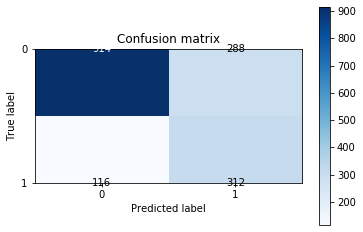

In [122]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


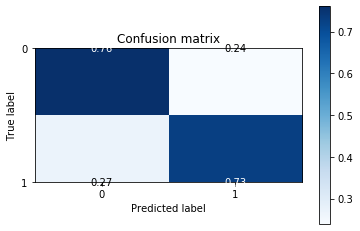

In [123]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],True)

In [124]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7289719626168224

In [125]:
recall_score(y_test,y_pred)

0.52

In [126]:
clf.score(X_test,y_test)

0.7521472392638037

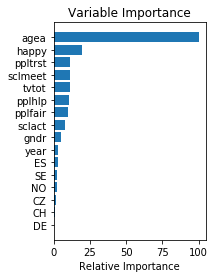

array([  0.14026693,   1.00768075,   1.93322924,   2.25472666,
         2.31093396,   3.14444873,   3.19092199,   5.28862375,
         8.0676451 ,   9.63778939,  10.89866122,  10.99151401,
        11.23573098,  11.66009455,  19.57434856, 100.        ])

In [127]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

feature_importance[sorted_idx]